# UDV - GROUP PROJECT

The dataset source: https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic

This dataset shows traffic to and from the Airport as a Percentage of the Traffic volume during the baseline period. The baseline period used for computing this metric is from 1st Feb to 15th March 2020. The dataset gets updated monthly. And for this project, the download time is 18/12/2020.


In [1]:
import sys # never mind these two commands.
sys.path.append('d:/anaconda/lib/site-packages')

In [28]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime

import folium
import matplotlib.pyplot as plt
import seaborn as sns
# import os
# import geopandas as gpd
# import geoplot as gplt
# import mapclassify
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# import numpy as np # linear algebra
# import plotly.express as px
# import re
# from shapely.geometry import Point, Polygon
# from shapely.geometry import MultiPolygon

In [3]:
%matplotlib inline

## Data Preporcessing

In [4]:
covid_impact_on_airport_traffic = pd.read_csv("covid_impact_on_airport_traffic.csv")

In [5]:
covid_impact_on_airport_traffic.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [6]:
covid_impact_on_airport_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [7]:
# Change data of "Date" column the date type
covid_impact_on_airport_traffic['Date'] = covid_impact_on_airport_traffic['Date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').date())

In [8]:
# create weekday column.
covid_impact_on_airport_traffic['weekday'] = covid_impact_on_airport_traffic['Date'].map(lambda x : x.weekday())
weekday_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
covid_impact_on_airport_traffic['weekday'] = [weekday_list[idx] for idx in covid_impact_on_airport_traffic['weekday']]

In [9]:
# create latitude and longtitude columns
def cut_long(point):
    long, _ = point[6:-1].split(" ")
    return float(long)

def cut_lat(point):
    _, lat = point[6:-1].split(" ")
    return float(lat)

covid_impact_on_airport_traffic['long'] = covid_impact_on_airport_traffic["Centroid"].map(cut_long)
covid_impact_on_airport_traffic['lat'] = covid_impact_on_airport_traffic["Centroid"].map(cut_lat)

In [10]:
# drop unnecessary columns
need_columns = [col for col in covid_impact_on_airport_traffic.columns if not col in ["AggregationMethod", "Version", "Centroid"]]
covid_impact_on_airport_traffic = covid_impact_on_airport_traffic[need_columns]

In [11]:
covid_impact_on_airport_traffic.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country,Geography,weekday,long,lat
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Fri,151.180088,-33.945977
1,2020-04-13,Kingsford Smith,29,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Mon,151.180088,-33.945977
2,2020-07-10,Kingsford Smith,54,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Fri,151.180088,-33.945977
3,2020-09-02,Kingsford Smith,18,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Wed,151.180088,-33.945977
4,2020-10-31,Kingsford Smith,22,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Sat,151.180088,-33.945977


In [12]:
# remain airports from US, drop other airports
covid_impact_on_airport_traffic_US = covid_impact_on_airport_traffic.loc[covid_impact_on_airport_traffic['Country']=='United States of America (the)']
covid_impact_on_airport_traffic_US.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country,Geography,weekday,long,lat
2806,2020-06-22,Los Angeles International,63,Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -...",Mon,-118.404993,33.941369
2807,2020-09-27,Los Angeles International,68,Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -...",Sun,-118.404993,33.941369
2808,2020-03-22,Los Angeles International,76,Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -...",Sun,-118.404993,33.941369
2809,2020-03-23,Los Angeles International,73,Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -...",Mon,-118.404993,33.941369
2810,2020-05-19,Los Angeles International,67,Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -...",Tue,-118.404993,33.941369


In [13]:
covid_impact_on_airport_traffic_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4441 entries, 2806 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               4441 non-null   object 
 1   AirportName        4441 non-null   object 
 2   PercentOfBaseline  4441 non-null   int64  
 3   City               4441 non-null   object 
 4   State              4441 non-null   object 
 5   ISO_3166_2         4441 non-null   object 
 6   Country            4441 non-null   object 
 7   Geography          4441 non-null   object 
 8   weekday            4441 non-null   object 
 9   long               4441 non-null   float64
 10  lat                4441 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 416.3+ KB


In [15]:
# save as csv file
outputpath='covid_impact_on_airport_traffic_US.csv'
covid_impact_on_airport_traffic_US.to_csv(outputpath,sep=',')

In [21]:
# geo data for each airport and save as csv file
us_airport_unique = covid_impact_on_airport_traffic_US[~covid_impact_on_airport_traffic_US[["AirportName"]].duplicated()].reset_index(drop=True)
us_airport_unique = us_airport_unique[['AirportName', 'City', 'State','ISO_3166_2', 'Country', 'long', 'lat']]
outputpath='us_airport_geoinfo.csv'
us_airport_unique.to_csv(outputpath,sep=',')

## Data Overview

In [22]:
# check airport locations on interactive map 

def visualise_airport_map(df, zoom):
    
    lat_map=30.038557
    lon_map=31.231781
    f = folium.Figure(width=1000, height=500)
    m = folium.Map([lat_map,lon_map], zoom_start=zoom).add_to(f)
        
    for i in range(0,len(df)):
        folium.Marker(location=[df["lat"][i],df["long"][i]],icon=folium.Icon(icon_color='white',icon ='plane',prefix='fa')).add_to(m)
        
    return m

In [27]:
visualise_airport_map(us_airport_unique, 1)

Text(0.5, 1.0, 'records for each airport')

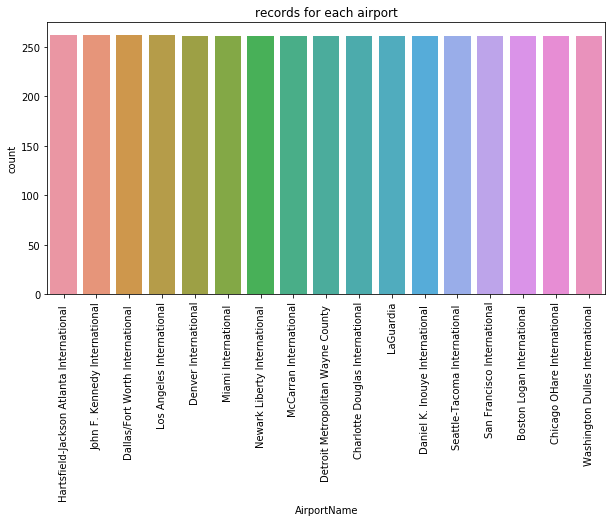

In [29]:
# count the number of records per airport
plt.figure(figsize=(10, 5))
g = sns.countplot(data=covid_impact_on_airport_traffic_US, x="AirportName",
              order = covid_impact_on_airport_traffic_US['AirportName'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("records for each airport")

In [30]:
covid_impact_on_airport_traffic_US['AirportName'].value_counts()

Hartsfield-Jackson Atlanta International     262
John F. Kennedy International                262
Dallas/Fort Worth International              262
Los Angeles International                    262
Denver International                         261
Miami International                          261
Newark Liberty International                 261
McCarran International                       261
Detroit Metropolitan Wayne County            261
Charlotte Douglas International              261
LaGuardia                                    261
Daniel K. Inouye International               261
Seattle-Tacoma International                 261
San Francisco International                  261
Boston Logan International                   261
Chicago OHare International                  261
Washington Dulles International              261
Name: AirportName, dtype: int64

Text(0.5, 1.0, 'records for each month')

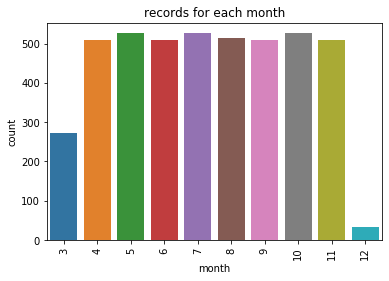

In [31]:
# count the number of records per month
df_month_count = pd.DataFrame(covid_impact_on_airport_traffic_US["Date"].map(lambda d: d.month).value_counts())
df_month_count = df_month_count.reset_index()
df_month_count = df_month_count.rename(columns={"Date":"count", "index":"month"})
g = sns.barplot(data=df_month_count.reset_index(), y="count", x="month")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("records for each month")

The numbers of records between April to November are roughly the same, but March and December are less. December records are rarely possible because the database has not yet updated December data.

In [32]:
# count the weekday records, roughly the same.
covid_impact_on_airport_traffic_US['weekday'].value_counts()

Tue    646
Wed    646
Mon    633
Sun    629
Thu    629
Sat    629
Fri    629
Name: weekday, dtype: int64

Text(0.5, 1.0, 'records for each month')

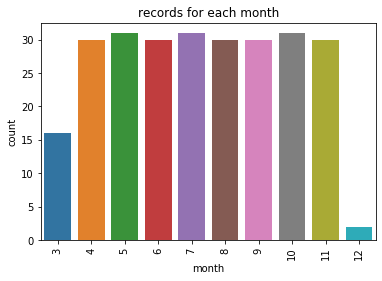

In [34]:
test = covid_impact_on_airport_traffic_US.loc[covid_impact_on_airport_traffic_US['AirportName']=='LaGuardia']
df_month_count_test = pd.DataFrame(test["Date"].map(lambda d: d.month).value_counts())
df_month_count_test = df_month_count_test.reset_index()
df_month_count_test = df_month_count_test.rename(columns={"Date":"count", "index":"month"})
g = sns.barplot(data=df_month_count_test.reset_index(), y="count", x="month")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("records for each month")

### data overview summary

- The dataset includes records from 17 U.S. airports.
- The number of records for each airport are roughly the same. And almost every airport records data every day.
- Because this dataset shows traffic to and from the Airport as a Percentage of the Traffic volume during the baseline period (The baseline period used for computing this metric is from 1st Feb to 15th March 2020). So it's important to show the baseline data in visualisation. 

## Data analysis for Visualisation Demo

Questions will be answered in the project:
- Overall impact
  - Is it recovering or is it getting worse?
  - Is it related to the region?
- I'd like to know the latest situation at a specific airport

Needed Data:
- The geo-info of each airport.
- The average baseline per month of each airport.
- The average baseline of November and December. (To show the latest situation, December's records less than 5, so use the average of Nov and Dec.)

In [36]:
df_airport_date_mean = covid_impact_on_airport_traffic_US[["AirportName", "Date", "PercentOfBaseline"]]
df_airport_date_mean["Date"] = df_airport_date_mean["Date"].map(lambda d: d.month)
df_airport_date_mean = df_airport_date_mean.groupby(["AirportName", "Date"]).mean()
df_airport_date_mean = df_airport_date_mean.reset_index()
df_airport_date_mean = df_airport_date_mean.merge(us_airport_unique, on="AirportName")
df_airport_date_mean = df_airport_date_mean.rename(columns={"Date": "month"})

D:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


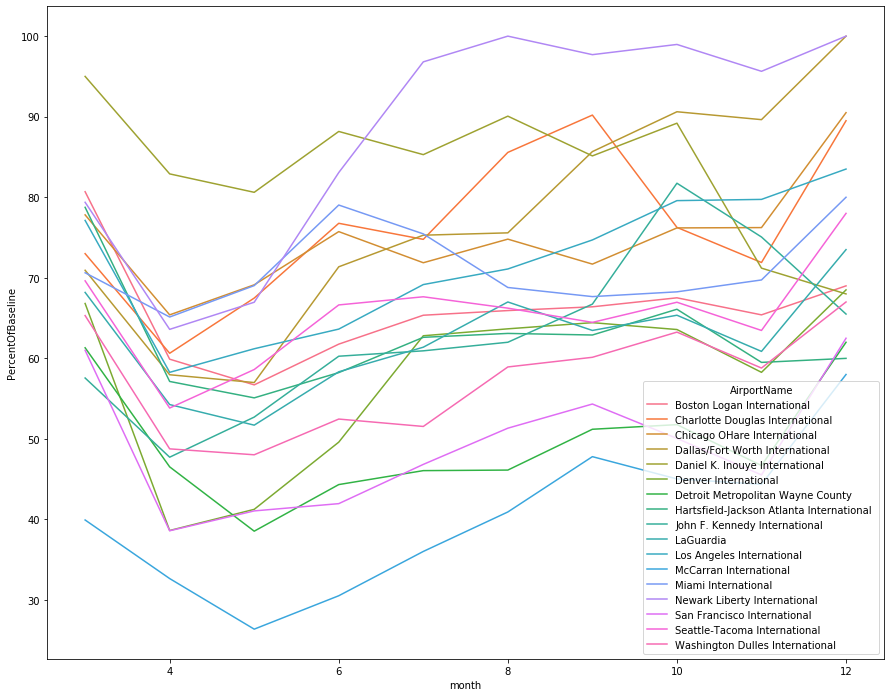

In [51]:
plt.figure(figsize=(15, 12))
sns.lineplot(data=df_airport_date_mean, x="month", y="PercentOfBaseline", hue='AirportName')
plt.show()

In [55]:
df_airport_date_mean.head()

,AirportName,month,PercentOfBaseline,City,State,ISO_3166_2,Country,long,lat
0,Boston Logan International,3,80.687500,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633
1,Boston Logan International,4,59.900000,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633
2,Boston Logan International,5,56.709677,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633
3,Boston Logan International,6,61.766667,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633
4,Boston Logan International,7,65.354839,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633


In [54]:
# save as csv file
outputpath='df_airport_month_mean.csv'
df_airport_date_mean.to_csv(outputpath,sep=',')